In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [16]:
from pathlib import Path

ROOT_DIR = Path(r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\Brain Tumor Data Set")



In [17]:
number_of_images = {}
for item in os.listdir(ROOT_DIR):
    item_path = os.path.join(ROOT_DIR, item)

    if os.path.isdir(item_path):      # Ensure it's a directory
        number_of_images[item] = len(os.listdir(item_path))
print(os.listdir(ROOT_DIR))


['Brain Tumor', 'Healthy']


In [18]:
print(os.listdir(ROOT_DIR))


['Brain Tumor', 'Healthy']


In [19]:
number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [20]:
len(os.listdir(r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\Brain Tumor Data Set"))

2

In [21]:
def dataFolder(p,split):
    if not os.path.exists("./"+p):
      os.mkdir("./"+p)
      for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice (a =os.listdir(os.path.join(ROOT_DIR,dir) ),
                                    size=(math.floor(split*number_of_images[dir])-5),
                                    replace=False) :
             O=os.path.join(ROOT_DIR,dir,img)
             D=os.path.join("./"+p,dir)
             shutil.copy(O,D)
             os.rename(O)
    else:
        print(f"{p}Folder exist")

In [22]:
dataFolder("train",0.7)

trainFolder exist


In [23]:
dataFolder("val",0.5)

valFolder exist


In [24]:
dataFolder("test",0.5)

testFolder exist


In [25]:
number_of_images={}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.path.join(ROOT_DIR,dir))
number_of_images.items()


dict_items([('Brain Tumor', 76), ('Healthy', 72)])

In [26]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
model =Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import keras

In [29]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [30]:
def preprocessingImages(path):
  """
  input:Path
  output:Pre processed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image
  

In [31]:
path=r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\train"
train_data=preprocessingImages(path)

Found 4600 images belonging to 2 classes.


In [33]:
def preprocessingImages2(path):
  """
  input:Path
  output:Pre processed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [36]:
path=r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\test"
test_data=preprocessingImages(path)

Found 4600 images belonging to 2 classes.


In [37]:
path=r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\test"
test_data=preprocessingImages2(path)

Found 4600 images belonging to 2 classes.


In [38]:
path=r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\val"
test_data=preprocessingImages2(path)


Found 4600 images belonging to 2 classes.


In [40]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')

mc=ModelCheckpoint(monitor="val_accuracy",filepath=".bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]


In [57]:
hs=model.fit(train_data,
             steps_per_epoch=8,
             epochs=30,
             verbose=1,
             validation_data=test_data,
             validation_steps=16,
             callbacks=cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 904ms/step - accuracy: 0.5630 - loss: 0.6799

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.56055, saving model to .bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5616 - loss: 0.6807 - val_accuracy: 0.5605 - val_loss: 0.6742
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.4883 - loss: 0.6961
Epoch 2: val_accuracy did not improve from 0.56055
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4944 - loss: 0.6943 - val_accuracy: 0.5410 - val_loss: 0.6724
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.5769 - loss: 0.6581
Epoch 3: val_accuracy improved from 0.56055 to 0.62695, saving model to .bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5805 - loss: 0.6580 - val_accuracy: 0.6270 - val_loss: 0.6514
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6462 - loss: 0.6467
Epoch 4: val_accuracy improved from 0.62695 to 0.70508, saving model to .bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6478 - loss: 0.6467 - val_accuracy: 0.7051 - val_loss: 0.6111
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.6888 - loss: 0.6012
Epoch 5: val_accuracy did not improve from 0.70508
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6886 - loss: 0.6006 - val_accuracy: 0.6309 - val_loss: 0.6453
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.6123 - loss: 0.6920
Epoch 6: val_accuracy did not improve from 0.70508
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6142 - loss: 0.6922 - val_accuracy: 0.6055 - val_loss: 0.6455
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.7174 - loss: 0.6209
Epoch 7: val_accuracy did not improve from 0.70508
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7132 - loss: 0.6215 - val_accuracy: 0.6621 - val_loss: 0.6283
Epoch 7: early stopping


In [58]:
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

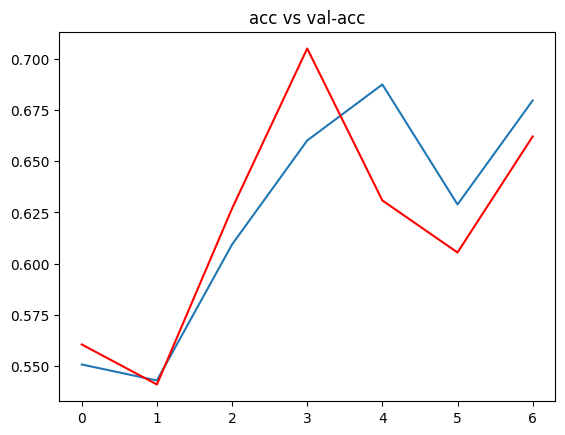

In [59]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("acc vs val-acc")
plt.show()

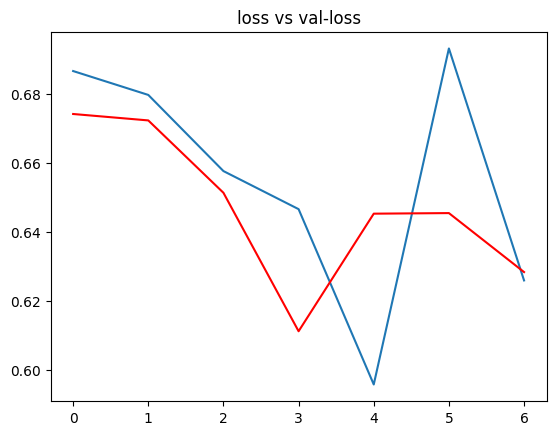

In [60]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("loss vs val-loss")
plt.show()

In [62]:
from keras.models import load_model

model =load_model(r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\.bestmodel.h5")

In [64]:
acc=model.evaluate(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")


144/144 ━━━━━━━━━━━━━━━━━━━━ 59s 405ms/step - accuracy: 0.6812 - loss: 0.6278
the accuracy of our model is 67.58695840835571%


In [65]:
from keras.preprocessing.image import load_img,img_to_array

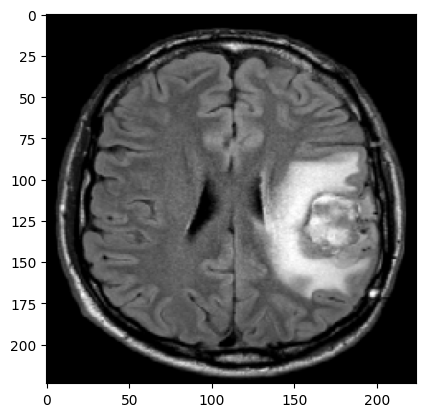

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class index: 0
the MRI is having a Tumor


In [78]:


path=r"C:\Users\LENOVO\OneDrive\Desktop\DL PROJECT\Brain Tumor Data Set\Brain Tumor\Cancer (1).png"

img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr.shape

input_arr=np.expand_dims(input_arr,axis=0)
pred_probs = model.predict(input_arr)
pred_class = np.argmax(pred_probs, axis=1)[0]
print(f"Predicted class index: {pred_class}")

if pred_class==0:
    print("the MRI is having a Tumor")
else:
    print("the MRI is not having a Tumor")
